# Inverse transform sampling for 2dim

> Paul G. Hoel, Introduction to Mahtemtical statistics, 5th edition, Wiley, 1984, ISBN:978-0471890454, p. 41

> Olver, Sheehan, and Alex Townsend. "Fast inverse transform sampling in one and two dimensions." arXiv preprint arXiv:1307.1223 (2013).

> Luc Devroye, Non-Uniform Random Variate Generation, Springer-Verlag, 1986, DOI:10.1007/978-1-4613-8643-8, ISBN:1461386454 

<table style="border-radius:8px;width:100%;">
<th style="text-align:center;background-color:rgb(0, 0, 0); color:white; border-top-left-radius: 10px;width:20%;">
Def</th>
<th style="text-align:left;">
Probability density function</th>
<tr style="text-align:center;">
<td colspan="2">

For continuous random variable $X$ and function $f$, $f$ is a *probability density* for $X$ that possesses the following properties:


$$f(x) \geq 0$$

$$\int_{-\infty}^\infty f(x) dx = 1$$

$$\int_{a}^b f(x) dx = P(a < X <b) $$

where $a,b$ are any two values of $x$ satisfying $a<b$.

</td>
</tr>

</table>

Cumulative distribution function of the discrete density


$$F_x(x) = P(X \leq x) = \sum_{x_i \leq x} P(X= x_i) = \sum_{x_i \leq x} p(x_i) $$

$$F_{xy}(x, y) = P(X \leq x, Y \leq y) = \sum_{x_i \leq x} \sum_{y_i \leq y } p(x_i, y_i)$$


In [1]:
import collections
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal
from intsam import *

Let $X \times Y \in [-\frac{W_x}{2}, \frac{W_x}{2}] \times [-\frac{W_y}{2}, \frac{W_y}{2}]$

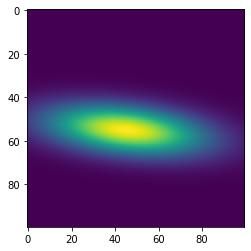

In [2]:
nx = ny = 100
end_xy = 2
x, y = np.mgrid[-end_xy:end_xy:end_xy/(nx/2), -end_xy:end_xy:end_xy/(nx/2)]
pos = np.dstack((x, y))
rv = multivariate_normal([0.2, -0.2], [[0.1, 0.1], [0.1, 1]])
plt.imshow(rv.pdf(pos))

In [3]:
A = rv.pdf(pos)
A /= A.sum()
A_cul = pmf2cdf_2d(A)
top_cul =A_cul.ravel()

In [4]:
xpos, ypos = np.meshgrid(np.arange(nx), np.arange(ny), indexing="ij")
X, Y = xpos.ravel(), ypos.ravel()

top =A.ravel()
bottom = np.zeros_like(top)
width = depth =0.5

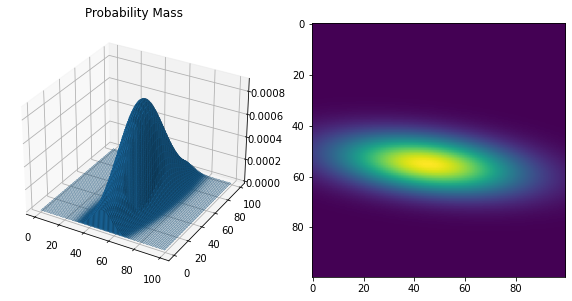

In [5]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 2, 1 ,projection='3d')
ax2 = fig.add_subplot(1, 2, 2)
ax.bar3d(X, Y, bottom, width, depth, top, shade=True, zsort='average')
ax.set_title("Probability Mass")
ax2.imshow(A)
plt.show()

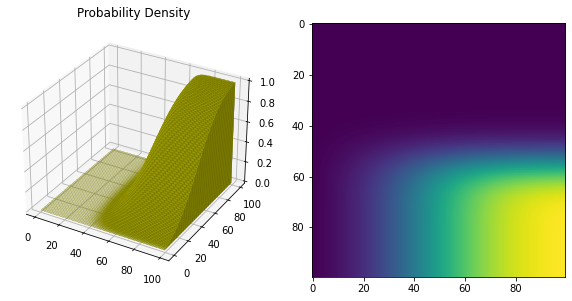

In [6]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 2, 1 ,projection='3d')
ax2 = fig.add_subplot(1, 2, 2)
ax.bar3d(X, Y, bottom, width, depth, top_cul, color="y", shade=True, zsort='average')
ax.set_title("Probability Density")
ax2.imshow(A_cul)
plt.show()

## For 2 dimension variable

About the probability density function $f_{XY}: \mathbb{R}^2 \rightarrow \mathbb{R}$ and its cumulative distribution function $F_{XY}: \mathbb{R}^2 \rightarrow [0, 1] \in \mathbb{R}$, there is no inverse routine for those function. 

Density function

$$f_{X|Y}(x |y) = \frac{f_{X,Y}(x, y)}{f_Y (y)}$$

only if $f_{Y}(y) >0$ otherwise $0$.

discrete version, mass function

$$p_{X|Y}(x |y) = \frac{p_{X,Y}(x, y)}{p_Y (y)}$$

Conditional c.d.f

$$F_{X|Y}(x,y') = P(X \leq x | Y = y') = \int_{-\infty}^x f_{X|Y}(u|y') du$$

discrete version, for probability mass function $p_{X|Y}$

$$ = \sum_{x' \leq x} p_{X|Y}(x' |y')$$

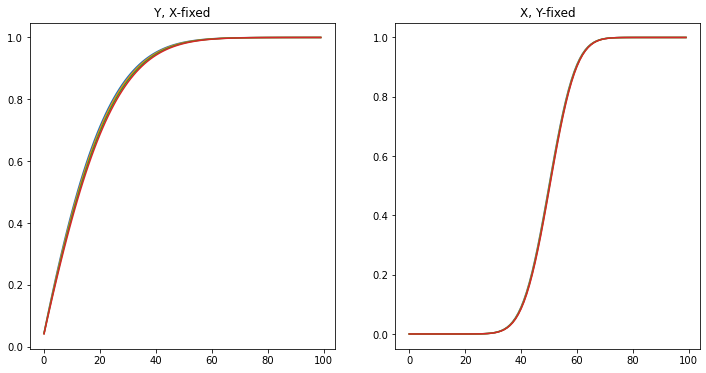

In [4]:
fig = plt.figure(figsize=(12,6))
rv_x, rv_y = np.arange(nx), np.arange(ny)
ax_x = fig.add_subplot(1, 2, 1)
ax_y = fig.add_subplot(1, 2, 2)
for i in range(0, 4):
    ax_x.plot(rv_x, cdf_cond(i, A))
    ax_y.plot(rv_y, cdf_cond(i, A, axis=1))
ax_x.set_title("Y, X-fixed")
ax_y.set_title("X, Y-fixed")
plt.show()


In [5]:
i = 2
pmf_i = pmf_cond(i, A, axis=0)
cdf_i = cdf_cond(i, A, axis=0)
rx = np.arange(nx)

0.9999999999999998


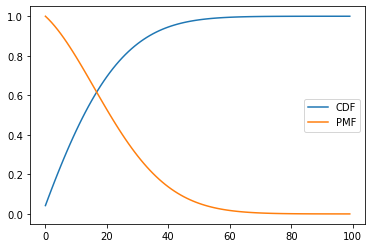

In [6]:
print(cdf_i.max())
plt.plot(rx, cdf_i/ cdf_i.max())
plt.plot(rx, pmf_i /pmf_i.max())
plt.legend(["CDF","PMF"])

In [14]:
uni_sam = np.linspace(0, 1, 2000,  endpoint=True)
uni_sam_p = np.linspace(0, 1, 100,  endpoint=True)
#uni_sam += (uni_sam[1] - uni_sam[0])/2

(0.0, 0.1)

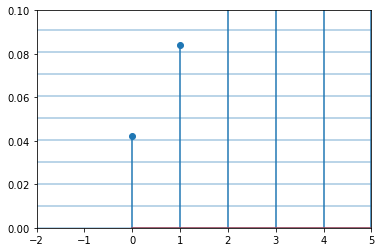

In [15]:
plt.stem(rx, cdf_i)
for uni in uni_sam_p:
    plt.axhline(uni, alpha=0.4)
plt.xlim([-2, 5])
plt.ylim([0,0.1])

In [14]:
cdf = cdf_i
interpolate = False
samples = []
for uni_i in uni_sam[:20]:
    min_sol = np.where(cdf <=uni_i)[0]
    max_sol = np.where(cdf >=uni_i)[0]
    min_index = min_sol.max() if min_sol.size != 0 else None
    max_index = max_sol.min() if max_sol.size != 0 else None
    print(min_index, max_index)
    if min_index == max_index:
        if min_index is None:
            pass # impossible
        else:
            samples.append(min_index)
    elif min_index is None or max_index is None:
        if min_index is None:
            samples.append(max_index)
        else:
            samples.append(min_index)
    else:
        if interpolate:
            dy = cdf[max_index] - cdf[min_index]
            dy_i = uni_i - cdf[min_index]
            dx_i = dy_i / dy
            samples.append(min_index + dx_i)
        else:
            #eps_min = math.fabs(cdf[min_index]-uni_i)
            #eps_max = math.fabs(cdf[max_index]-uni_i)
            #if eps_min <= eps_max:
            #    samples.append(min_index)
            #else:
            #    samples.append(max_index)
            samples.append(max_index)
print(samples)


None 0
None 0
None 0
None 0
None 0
None 0
None 0
None 0
None 0
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
1 2
1 2
1 2
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2]


In [16]:
sample = int_sampling(uni_sam, pmf_i)
sample_i = int_sampling(uni_sam, pmf_i, interpolate=True)


In [17]:
data = collections.Counter(sample)

In [19]:
print(data[0], data[1])

85 83


In [20]:
y = np.zeros_like(pmf_i)
for key in data.keys():
    y[int(key)] = data[key]

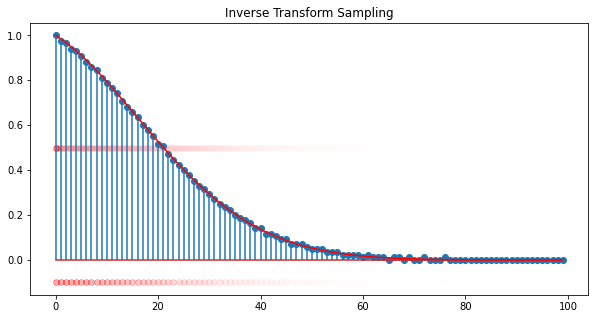

In [21]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()
ax.stem(rx, y/y.max())
ax.scatter(sample_i, 0.5*np.ones_like(sample_i), c="r", alpha=0.002)
ax.scatter(sample, -0.1*np.ones_like(sample), c="r", alpha=0.003)
ax.plot(rx, pmf_i/pmf_i.max(), color="r")
ax.set_title("Inverse Transform Sampling")
plt.show()

#### Continuous root finding inverse transform

In [65]:
from scipy.optimize import bisect
from scipy.special import erf
from scipy.stats import gaussian_kde
def int_sampling_root(
        uni_sam,
        cdf,
        domain
    ):
    result = []
    for uni_s in uni_sam:
        result.append(bisect(lambda x: cdf(x) - uni_s, *domain))
    return np.array(result)

In [66]:
cdf_gaussian = lambda x : 0.5*(1+erf((x-5)/2)) # sample cdf function
cdf_gaussian_norm = lambda x: (cdf_gaussian(x) - cdf_gaussian(0))/(cdf_gaussian(10) - cdf_gaussian(0))

In [67]:
x = np.linspace(0, 10, 300)
samples = int_sampling_root(uni_sam, cdf_gaussian_norm, domain = [0, 10])
kernel_density  = gaussian_kde(samples)
y = kernel_density(x)

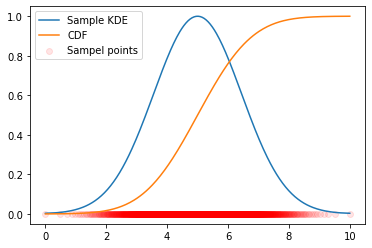

In [73]:
plt.plot(x, y/y.max(), label="Sample KDE")
plt.plot(x, cdf_gaussian_norm(x), label="CDF")
plt.scatter(samples, -0.0* np.ones(samples.size), alpha = 0.1, c="r", label="Sampel points")
plt.legend()

### Inverse sampling

**Discrete Version**

1. Sort CDF value by increasing order
2. from lowest value start loop
    1. For given $U$ values, find index where $U <= cdf_i$.
    2. Update $U$ by extracting above values $U$.
    3. repeat until $U$ become empty.

Interpolate version cannot use this method
  

In [74]:
from numpy.polynomial.chebyshev import Chebyshev
def cheby_range_transform(x, a, b): # [-1, 1] -> [a, b]
    return ((b-a)/2)*x + (b+a)/2
def cheby_range_inv_transform(x, a, b): # [a, b] -> [-1, 1]
    return (2/(b-a))*x - (b+a)/(b-a)
def cheby_ext_grid(a, b, n):
    x_i = np.cos((np.pi/n-1)*np.arange(n))
    return cheby_range_transform(x_i, a, b)
def cheby_root_grid(a, b, n):
    x_i = np.cos((np.pi/n)*(0.5+np.arange(n)))
    return cheby_range_transform(x_i, a, b)

In [79]:
cheby_f1 = Chebyshev([1, 2, 3])
cheby_f2 = Chebyshev([1, 1, 1])

In [83]:
cheby_f3 = cheby_f1 + cheby_f2
cheby_f4 = cheby_f1 * cheby_f2

In [84]:
x1 = 0.2
print(cheby_f1(x1), cheby_f2(x1))
print("f1()+ f2()=",cheby_f3(x1))
print("f1()*f2()=",cheby_f4(x1))

-1.3599999999999999 0.27999999999999997
f1()+ f2()= -1.08
f1()*f2()= -0.38080000000000014


In [85]:
type(cheby_f3)

numpy.polynomial.chebyshev.Chebyshev

In [6]:
np.arange(4)

array([0, 1, 2, 3])

In [7]:
(np.arange(4))[2:]

array([2, 3])

In [104]:
rx.max()

99

In [116]:
rx.shape[0]

100

In [125]:
pmf_approx = Chebyshev.fit(rx, pmf_i, deg=50, domain=[0, 100])

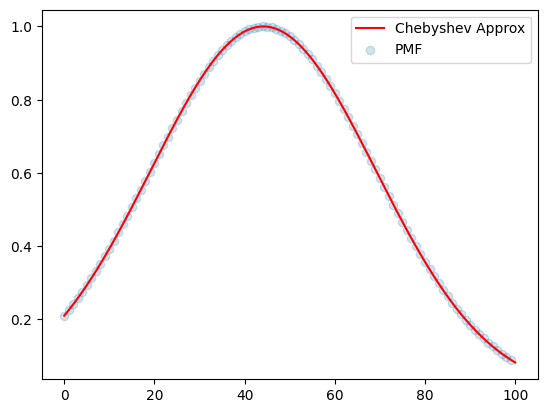

In [126]:
x = np.linspace(0, 100, 1000, endpoint=True)
y = pmf_approx(x)
plt.plot(x, y/y.max(), c="r")
plt.scatter(rx, pmf_i/pmf_i.max(), alpha=0.2)
plt.legend(["Chebyshev Approx","PMF"])

In [127]:
cdf_approx = Chebyshev.fit(rx, cdf_i, deg=50, domain=[0, 100])

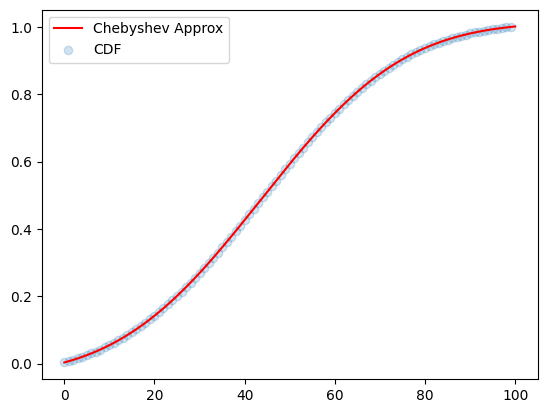

In [128]:
x = np.linspace(0, 100, 1000, endpoint=True)
y = cdf_approx(x)
plt.plot(x, y, c="r")
plt.scatter(rx, cdf_i, alpha=0.2)
plt.legend(["Chebyshev Approx","CDF"])

In [ ]:
# fing degree where all positive for given range

## CDF approximation

One problem of inverse transform in calculation process is inverse search.
Unless we know anlaytic form of inverse CDF, the only way to get $X$ value with $F^{-1}(U) =X$ is root finding with next formula.

$$F(X) -U = 0$$

However, root finding algorithms have to calcualte the given function value several times, it is inevitable to avoid computational inefficience than directly calculate inverse function. The unkown probability disribution and only the sampled data or results are exist is very common situation. In many of those cases, even, we don't have an explicit formula of the probability distribution. Using $F^{-1}(U) =X$ is a very special case. 


Thus, there is an attemption that approximating PDF function with orthogonal polynomials to accelerating calculation. If the PDF can be approximated with polynomial, we can get explicit formula to be used in computation and its calculation is more faster than general functions. The next paper suggested Chebyshev polynomial approximation method.

> Olver, Sheehan, and Alex Townsend. "Fast inverse transform sampling in one and two dimensions." arXiv preprint arXiv:1307.1223 (2013).

Olver and Alex stated that there are plenty of orthogonal polynomials but the Chebyshev basis is stable for computation in expansion coefficient $\alpha_i$. Its computational cost in time is $\mathcal{O}(n \log n)$.

Chebyshev grid

$$n = 2^k +1$$

$$\overline{F}(x) = \int_{a}^x \overline{f}(s) ds = \sum_{k=0}^n \alpha_k \int_a^{x} T_k (\frac{2 (s-a)}{b-a} -1) ds$$
$$= \sum_{k=0}^n \alpha_k \frac{b-a}{2} \int_{-1}^{\frac{2(x-a)}{b-a}-1} T_k (t) dt$$

$$\int^s T_k(t) dt = \begin{cases} 
      \frac{1}{2}(\frac{T_{k+1}(s)}{k+1} - \frac{T_{|k-1|}(s)}{k-1}) & k \neq 1 \\
      \frac{1}{4} T_2 (s) & k =1
   \end{cases}$$

$$= \frac{b-a}{2} ( \alpha_0  \frac{2(x-a)}{b-a} + \alpha_1 \frac{1}{4} (T_2(s_2) - T_2(s_1)) + $$ 
$$ \sum_{k=2}^{n} \alpha_k \left( \frac{1}{2}(\frac{T_{k+1}(s_2)}{k+1} - \frac{T_{|k-1|}(s_2)}{k-1}) - \frac{T_{k+1}(s_1)}{k+1} + \frac{T_{|k-1|}(s_1)}{k-1} \right))$$

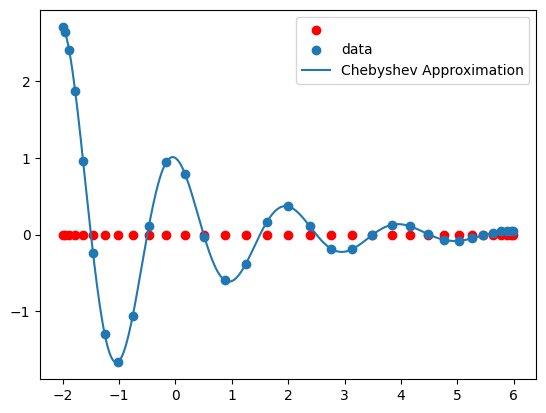

In [92]:
k =5
N = 2**k+1
a= -2
b = 6
x = cheby_root_grid(a, b, N)
y = np.cos(np.pi*x) *np.exp(-0.5*x)

cheby_approx = Chebyshev.fit(x, y, deg=x.shape[0]-1 , domain=[a,b])
x_p = np.linspace(a, b, 10*N, endpoint=True)
plt.scatter(x, np.zeros(N), c="r")
plt.scatter(x, y)
plt.plot(x_p, cheby_approx(x_p))
plt.legend(["", "data", "Chebyshev Approximation"])

plt.show()

(0.4, 1.5)

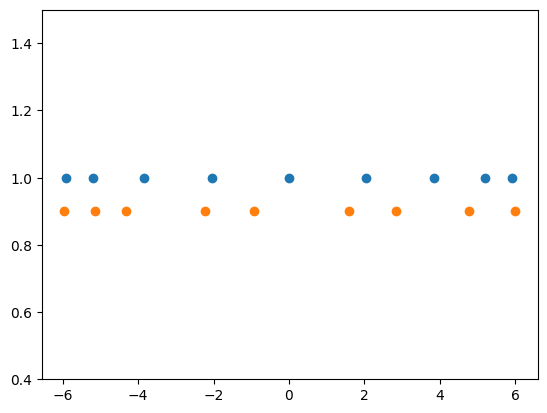

In [82]:
n= 9
x1 = cheby_root_grid(-6, 6, n)
x2 = cheby_ext_grid(-6, 6, n)
plt.scatter(x1, np.ones(n))
plt.scatter(x2, 0.9*np.ones(n))
plt.ylim(0.4, 1.5)

---



> A. Townsend and L. N. Trefethen, Gaussian elimination as an iterative algorithm,
SIAM News, March 2013

> Townsend, Alex and Trefethen, Lloyd N., An Extension of Chebfun to Two Dimensions, SIAM Journal on Scientific Computing, vol. 35, Number 6, 2013, pp. C495-C518, doi:10.1137/130908002

$$f(x, y) \approx \sum_{j =1}^\infty \sigma_j, \phi_j (y) \psi_j(x)$$

Its rank $k$ approximation is 

$$f_k(x, y) =  \sum_{j =1}^k \sigma_j, \phi_j (y) \psi_j(x)$$

$$|| f - f_k||_{L^2} = \left(\sum_{j = k+1}^\infty \sigma_j^2 \right)^{1/2}$$

1. $f(x,y)$
2. pick $(x_1, y_1)$ such that $|f(x_1, y_1)| = max(|f|)$
    1. $f_1 (x, y) = \frac{u_1(y), v_1(x)}{f(x_1, y_1)}$,
       1. $u_1(y) = f(x_1, y)$
       2. $v_1(x) = f(x, y_1)$
    2. Find $(x_2, y_2)$ such that $|f- f_1|(x_2, y_2) = max(|f- f_1|)$.
       1. $f_{\alpha} (x, y) = \frac{u_2(y), v_2(x)}{f_1(x_2, y_2)}$,
            1. $u_2(y) = f(x_2, y)$
            2. $v_2(x) = f(x, y_2)$
       2. $f_2 = f_1 + f_{\alpha}$  

In [1]:
from numbers import Number
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from intsam import *

In [14]:
dim_k = 10
fx_list =np.array([lambda x: np.exp((i+1)+x) for i in range(0, dim_k)])
fy_list =np.array([lambda y: np.log((i+1)*y) for i in range(0, dim_k)])
weights = 0.6*(np.arange(dim_k) +1)
f_approx = RankApprox2dim(fx_list, fy_list, weights)

In [15]:
X, Y = np.meshgrid(np.linspace(0, 3 , 200), np.linspace(0, 3 , 200))
Z = f_approx(X, Y)
Z2= f_approx.partial(5,8)(X,Y)

C:\Users\qwqwh\AppData\Local\Temp\ipykernel_6924\755003363.py:3: RuntimeWarning: divide by zero encountered in log
  fy_list =np.array([lambda y: np.log((i+1)*y) for i in range(0, dim_k)])


c:\Users\qwqwh\anaconda3\envs\uilc\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:124: RuntimeWarning: invalid value encountered in divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


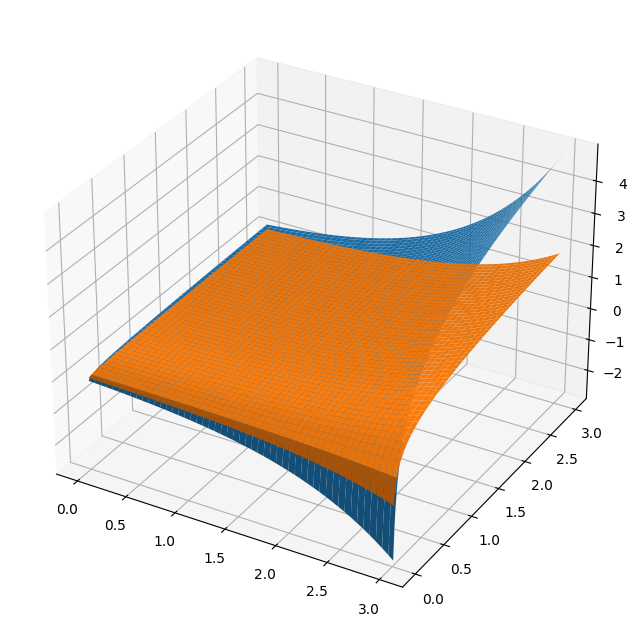

In [16]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, Z)
ax.plot_surface(X, Y, Z2)
plt.show()

In [131]:
original_f = lambda x, y: x+y # example
approx_points = np.array([[1,2], [3, 4], [5,6], [7, 8]]) # (n, 2)
f_values = original_f(*approx_points.transpose())# applying function of 2 variables to pivot array
pivots_f = [approx_points, f_values] # (x, y), z pair

SVD approximation for given function

In [1]:
import numpy as np
from numpy.polynomial.chebyshev import Chebyshev
from typing import Literal
from matplotlib import pyplot as plt
from matplotlib import cm
from intsam import RankApprox2dim, cheby_ext_grid, cheby_root_grid
from scipy.signal import convolve2d

def meshgrid2points(X, Y):
    x1 = X.reshape(-1)
    y1 = Y.reshape(-1)
    xy = np.vstack([x1, y1])
    return xy.transpose()
def get_xy_decompose(f, point, domain, deg):
    a, b, c, d = domain
    x, y = point
    x_list = np.linspace(a, c, deg+1, endpoint=True)
    y_list = np.full_like(x_list, y)
    z_list = f(x_list, y_list)
    v_i = Chebyshev.fit(x_list, z_list, deg=deg, domain=(b, d))

    y_list = np.linspace(b, d, deg+1, endpoint=True)
    x_list = np.full_like(y_list, x)
    z_list = f(x_list, y_list)
    u_i = Chebyshev.fit(y_list, z_list, deg=deg, domain=(a, c))

    return u_i, v_i

In [2]:
test_function = lambda x, y : np.exp(-100*(x-1)**2) + np.exp(-100*(y+1)**2) * (1+np.cos(20*x))

In [4]:
xdim = (-3, 3)
ydim = (-3, 3)
dim = 5
X, Y = np.meshgrid(np.linspace(*xdim, dim), np.linspace(*ydim, dim))
xy_points = meshgrid2points(X, Y)
tol = 1E-30
max_iter = 20

In [5]:
#Chebyshev degree
cheby_deg = 30
domain = [xdim[0], ydim[0], xdim[1], ydim[1]]

In [ ]:
e_0 = lambda x, y: test_function(x, y)
f_0 = RankApprox2dim(lambda x: x, lambda y: y, 0)
e_k_val = np.array(list(map(e_0, *(xy_points.transpose())))) # calculate function value

In [6]:
for k in range(0, max_iter):
    e_k_val = np.array(list(map(e_0, *(xy_points.transpose())))) # calculate function value
    if np.abs(e_k_val).max() < tol:
        break
    x_k, y_k = xy_points[np.argmax(np.abs(e_k_val))]
    u_k, v_k = get_xy_decompose(e_k, (x_k, y_k ), domain, cheby_deg)
    d_k  = 1/ e_k(x_k, y_k)
    e_k = lambda x, y: e_k(x, y) - d_k * v_k(y)*u_k(x)
    f_k = lambda x, y: f_k(x, y) + d_k * v_k(y)*u_k(x)


: 

: 

In [32]:
e_k_val = np.array(list(map(test_function, *(xy_points.transpose())))) # calculate function value
x_k, y_k = xy_points[np.argmax(np.abs(e_k_val))]
u_k, v_k = get_xy_decompose(e_k, (x_k, y_k ), domain, cheby_deg)

In [50]:
np.vstack([x_list, y_list]).shape

(2, 201)

In [26]:
point_max

array([ 1.5, -1.5])

In [27]:
test_function(1.5, -1.5)

2.991812320705612e-11

In [ ]:
w_i, c_i, v_i = get_k_element(f_apporox, f, domain, deg)

In [ ]:
f_approx = RankApprox2dim(c_i, v_i, w_i)
# Get new w_i, c_i, v_i
f_approx.rank_up(c_i, v_i, w_i)

### Verification

In [ ]:
# 1 dim
pdf_1dim_1 = lambda x : np.exp(-x**2/2) * (1+ np.sin(3*x)**2) * (1+np.cos(5*x)**2)
pdf_1dim_2 = lambda x : np.exp(-4*x**2) * (9+ 72*x**2 - 192*x**4 + 512*x**6)
pdf_1dim_3 = lambda x : 2+ np.cos(100*x)
pdf_1dim_4 = lambda x : 1/np.cosh(200*x)
# 2 dim
pdf_2dim_1=  lambda x, y : np.exp(-100*(x-1)**2) + np.exp(-100*(y+1)**2) * (1+np.cos(20*x))
pdf_2dim_2=  lambda x, y : np.exp(-(x**4)/2 -(y**4)/2) * (x-y)**2
pdf_2dim_3=  lambda x, y : np.exp(-x**2 -2*y**2) * (1/np.cosh(10*x*y))
pdf_2dim_4=  lambda x, y : np.exp(-x**2 -2*y**2) *(y-x)**2 * (1/np.cosh(10*x*y))